In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
import pickle

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [4]:
with open('/home/ubuntu/Downloads/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Loading Data

In [8]:
import pandas
data = pandas.read_csv('/home/ubuntu/Downloads/preprocessed_data.csv')

In [10]:
essay_data=data['essay'].tolist()

In [11]:
from tqdm import tqdm

### Calculating Sentiment scores using NLTK

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


In [12]:
compound=[]
neg=[]
neu=[]
pos=[]
for i in tqdm(essay_data):
  mm=sid.polarity_scores(i)
  compound.append(mm['compound'])
  neg.append(mm['neg'])
  neu.append(mm['neu'])
  pos.append(mm['pos'])

100%|██████████| 109248/109248 [02:28<00:00, 737.71it/s]


In [13]:
uu=data.copy()
uu['compound']=compound
uu['neg']=neg
uu['neu']=neu
uu['pos']=pos


In [14]:
data=uu.copy()

In [15]:
data

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.9867,0.013,0.783,0.205
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.9897,0.072,0.680,0.248
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.9860,0.017,0.721,0.262
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.9524,0.030,0.783,0.187
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.9873,0.029,0.683,0.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36,0.8860,0.087,0.772,0.141
109244,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57,0.9705,0.051,0.722,0.227
109245,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00,0.7960,0.044,0.868,0.088
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73,0.9866,0.052,0.643,0.305


In [16]:
y=data['project_is_approved']
del data['project_is_approved']
x=data

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=None, train_size=None, random_state=42, shuffle=True, stratify=y)

### Using TFIDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
essay_tfidf_train = vectorizer.fit_transform(x_train['essay'])
essay_tfidf_test=vectorizer.transform(x_test['essay'])

In [19]:
essay_tfidf_train.shape

(81936, 50440)

In [20]:
essay_tfidf_test.shape

(27312, 50440)

In [21]:
tfidf_model=vectorizer
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
# average Word2Vec
# compute average word2vec for each review.
import numpy as np
x_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_vectors.append(vector)

print(len(x_train_tfidf_w2v_vectors))
print(len(x_train_tfidf_w2v_vectors[0]))

100%|██████████| 81936/81936 [02:21<00:00, 577.79it/s]

81936
300


In [23]:
# average Word2Vec
# compute average word2vec for each review.
x_test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_vectors.append(vector)

print(len(x_test_tfidf_w2v_vectors))
print(len(x_test_tfidf_w2v_vectors[0]))

100%|██████████| 27312/27312 [00:46<00:00, 585.19it/s]

27312
300


In [24]:
from tqdm import tqdm
categorical=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
categorical_train=dict()
categorical_test=dict()
for i in tqdm(categorical):
   categorical_train[i]= vectorizer.fit_transform(x_train[i])
   categorical_test[i]=vectorizer.transform(x_test[i])

100%|██████████| 5/5 [00:01<00:00,  3.73it/s]


In [25]:
x_train

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,compound,neg,neu,pos
66441,ok,mr,grades_6_8,0,appliedlearning,charactereducation,my wonderful middle students active extremely ...,314.56,0.9915,0.011,0.612,0.377
45954,ut,mrs,grades_prek_2,19,specialneeds,specialneeds,i teach special class children autism one stud...,33.28,0.9818,0.015,0.740,0.245
73547,nc,mrs,grades_3_5,0,math_science appliedlearning,appliedsciences charactereducation,our school serves students variety backgrounds...,433.26,0.9923,0.031,0.626,0.344
25693,ca,ms,grades_prek_2,5,math_science literacy_language,health_lifescience literacy,our school fabulous international baccalaureat...,162.95,0.9882,0.000,0.726,0.274
62089,ca,mr,grades_3_5,37,literacy_language,literacy,my students amazing diverse group fruitvale ne...,233.51,0.9916,0.010,0.782,0.208
...,...,...,...,...,...,...,...,...,...,...,...,...
25210,ca,mrs,grades_6_8,60,math_science,mathematics,how many times sit math class think i no idea ...,139.00,0.9519,0.068,0.782,0.150
290,mi,mr,grades_3_5,0,literacy_language math_science,literature_writing mathematics,technology become wings allow educational worl...,13.99,0.9879,0.058,0.737,0.205
49514,ia,mrs,grades_9_12,1,math_science,environmentalscience,my students come rural community live country ...,1365.30,0.9824,0.018,0.714,0.267
6610,fl,ms,grades_3_5,3,literacy_language,literature_writing,my students hard working students however gaps...,7.49,0.9844,0.036,0.721,0.243


In [26]:
numerical_test=dict()
numerical_train=dict()
numerical=['teacher_number_of_previously_posted_projects','price','compound',	'neg'	,'neu'	,'pos']
for i in tqdm(numerical):
  numerical_train[i]=(np.array(x_train[i]).reshape(1,-1))#.reshape(-1,1)
  numerical_test[i]=(np.array(x_test[i]).reshape(1,-1))#.reshape(-1,1)

100%|██████████| 6/6 [00:00<00:00, 2423.75it/s]


In [27]:
from scipy.sparse import  hstack
u=hstack(list(categorical_train.values())+[essay_tfidf_train])

In [28]:
essay_tfidf_train.shape

(81936, 50440)

In [29]:
X=hstack([u,list(numerical_train.values())[0].reshape(-1,1),list(numerical_train.values())[1].reshape(-1,1),list(numerical_train.values())[2].reshape(-1,1),list(numerical_train.values())[3].reshape(-1,1),list(numerical_train.values())[4].reshape(-1,1),list(numerical_train.values())[5].reshape(-1,1)])

In [30]:
from scipy.sparse import  hstack
v=hstack(list(categorical_test.values())+[essay_tfidf_test])


In [31]:
X_test=hstack([v,list(numerical_test.values())[0].reshape(-1,1),list(numerical_test.values())[1].reshape(-1,1),list(numerical_test.values())[2].reshape(-1,1),list(numerical_test.values())[3].reshape(-1,1),list(numerical_test.values())[4].reshape(-1,1),list(numerical_test.values())[5].reshape(-1,1)])

In [32]:
X_test.shape

(27312, 50545)

In [33]:
u=hstack(list(categorical_train.values())+[x_train_tfidf_w2v_vectors])

In [34]:
uu=hstack(list(categorical_test.values())+[x_test_tfidf_w2v_vectors])

In [35]:
X1=hstack([u,list(numerical_train.values())[0].reshape(-1,1),list(numerical_train.values())[1].reshape(-1,1),list(numerical_train.values())[2].reshape(-1,1),list(numerical_train.values())[3].reshape(-1,1),list(numerical_train.values())[4].reshape(-1,1),list(numerical_train.values())[5].reshape(-1,1)])

In [36]:
X_test1=hstack([uu,list(numerical_test.values())[0].reshape(-1,1),list(numerical_test.values())[1].reshape(-1,1),list(numerical_test.values())[2].reshape(-1,1),list(numerical_test.values())[3].reshape(-1,1),list(numerical_test.values())[4].reshape(-1,1),list(numerical_test.values())[5].reshape(-1,1)])

In [37]:
X1.shape

(81936, 405)

In [38]:
X_test1.shape

(27312, 405)

### Hyperparamater Tuning Decision Tree Classifer

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model1=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model1.fit(X,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [40]:
auc=model1.cv_results_['mean_test_score']

In [41]:
auc1=model1.cv_results_['mean_train_score']

In [42]:
model1.cv_results_['param_max_depth']

masked_array(data=[1, 1, 1, 1, 3, 3, 3, 3, 10, 10, 10, 10, 30, 30, 30, 30],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

In [43]:
import pandas as pd

In [44]:
y11=pd.DataFrame(data=auc.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

In [45]:
y11

,5,10,100,500
1,0.549858,0.549858,0.549858,0.549858
3,0.601530,0.601530,0.601530,0.601530
10,0.644602,0.644785,0.647660,0.650775
30,0.582898,0.585348,0.615712,0.642771


In [46]:
y1=pd.DataFrame(data=auc1.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

Text(0.5, 1.0, 'Train set')

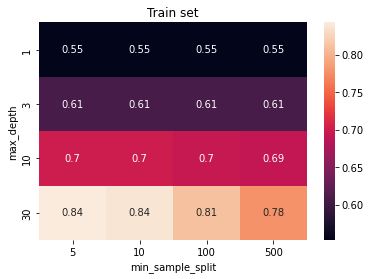

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y1,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Train set')

Text(0.5, 1.0, 'Test set')

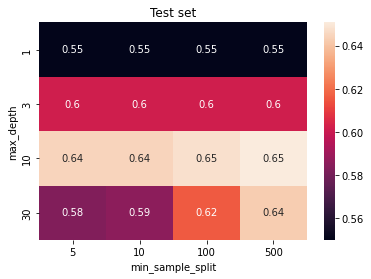

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y11,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Test set')

In [49]:
#best model paramaters 
model1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

### Training model with best hyperparamaters

In [50]:
m=DecisionTreeClassifier(max_depth=model1.best_params_['max_depth'],min_samples_split=model1.best_params_['min_samples_split'])
m.fit(X,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [51]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,m.predict_proba(X).T[1])
fpr_test,tpr_test,threshold_test=roc_curve(y_test,m.predict_proba(X_test).T[1])

In [52]:
#auc for train data
auc(fpr_train,tpr_train)

0.6903785681614972

In [53]:
#auc for test data
auc(fpr_test,tpr_test)

0.6549693750838759

Text(0, 0.5, 'tpr')

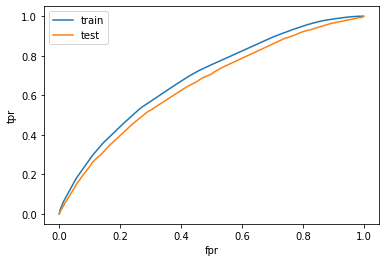

In [54]:
plt.plot(fpr_train,tpr_train,label='train')
plt.plot(fpr_test,tpr_test,label='test')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [55]:
def best_threshold(fpr,tpr,threshold):
  return threshold[np.argmax(tpr*(1-fpr))]

In [56]:
def pre_thre(prob,thre):
  u=[]
  for i in prob:
    if i>=thre:
      u.append(1)
    else:
      u.append(0)  
  return u

In [57]:
best_thre=best_threshold(fpr_train,tpr_train,threshold_train)

In [58]:
#best threshold 
best_thre

0.8520286396181385

In [59]:
best_threshold_proba_values=pre_thre(m.predict_proba(X).T[1],best_thre)

In [60]:
best_threshold_proba_values_test=pre_thre(m.predict_proba(X_test).T[1],best_thre)

In [62]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'actual')

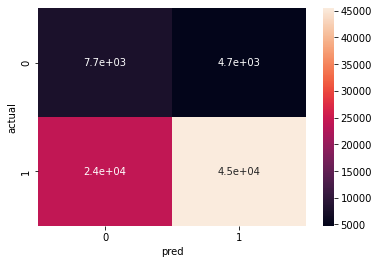

In [63]:
#train set 
sns.heatmap(confusion_matrix(y_train,best_threshold_proba_values),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

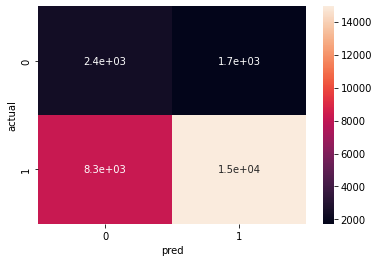

In [64]:
#test set 
sns.heatmap(confusion_matrix(y_test,best_threshold_proba_values_test),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [65]:
import warnings
warnings.filterwarnings('ignore')
fp=pd.DataFrame(columns=x.columns)
mp=model1.predict(X)
for i in tqdm(range(len(y_train))):
  if mp[i]==1 and y_train.iloc[i]==0:
    fp=fp.append(x.iloc[i])

100%|██████████| 81936/81936 [00:33<00:00, 2447.78it/s]


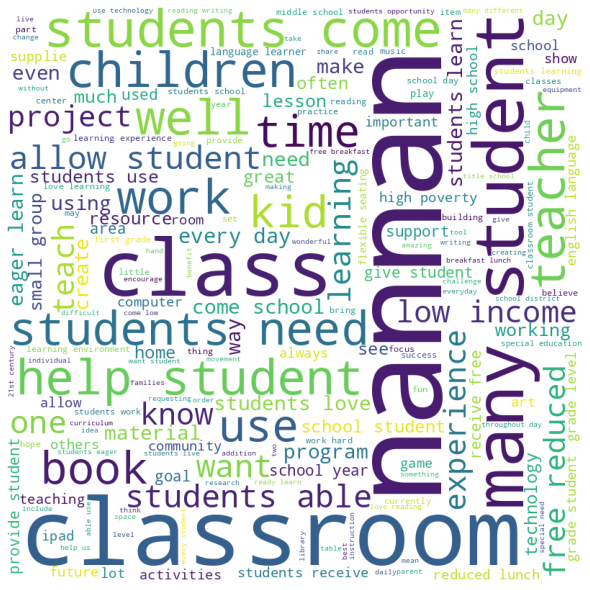

In [66]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = fp
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:xlabel='teacher_number_of_previously_posted_projects', ylabel='Density'>

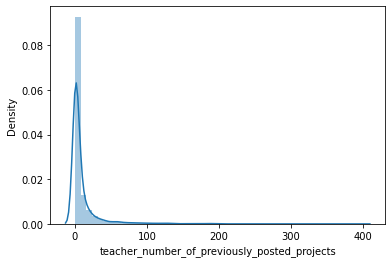

In [67]:
sns.distplot(fp['teacher_number_of_previously_posted_projects'])

<AxesSubplot:xlabel='price'>

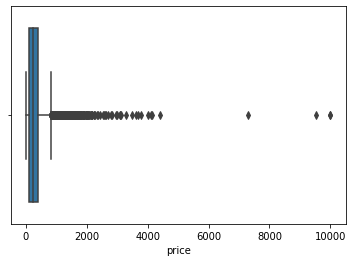

In [68]:
sns.boxplot(fp['price'])

### Hyperparamater Tuning Decision Tree Classifier after adding TFIDF weighted glove vectors feature to the dataset

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model2=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model2.fit(X1,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [71]:
model11=model1

In [72]:
model1=model2

In [73]:
X11=X
X=X1

In [74]:
auc=model1.cv_results_['mean_test_score']

In [75]:
auc1=model1.cv_results_['mean_train_score']

In [76]:
model1.cv_results_['param_max_depth']

masked_array(data=[1, 1, 1, 1, 3, 3, 3, 3, 10, 10, 10, 10, 30, 30, 30, 30],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

In [77]:
import pandas as pd

In [78]:
y11=pd.DataFrame(data=auc.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

In [79]:
y11

,5,10,100,500
1,0.561014,0.561014,0.561014,0.561014
3,0.611421,0.611407,0.611421,0.611421
10,0.620477,0.620242,0.625822,0.634020
30,0.504889,0.510064,0.571317,0.618664


In [80]:
y1=pd.DataFrame(data=auc1.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

Text(0.5, 1.0, 'Train set')

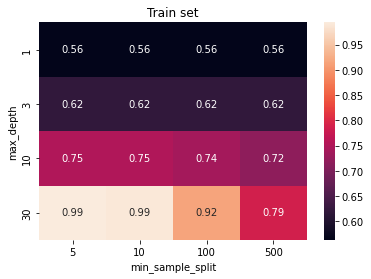

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y1,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Train set')

Text(0.5, 1.0, 'Test set')

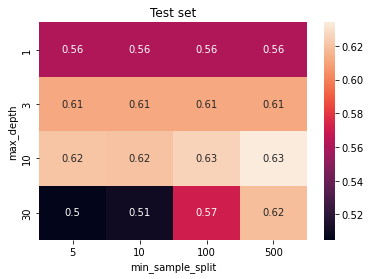

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y11,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Test set')

In [83]:
#model best paramateres
model1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

### Training model with best hyperparamaters

In [84]:
m=DecisionTreeClassifier(max_depth=model1.best_params_['max_depth'],min_samples_split=model1.best_params_['min_samples_split'])
m.fit(X,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [85]:
X_test11=X_test
X_test=X_test1

In [86]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,m.predict_proba(X).T[1])
fpr_test,tpr_test,threshold_test=roc_curve(y_test,m.predict_proba(X_test).T[1])

In [87]:
#auc value for train data
auc(fpr_train,tpr_train)

0.7194121284943547

In [88]:
#auc value for test data
auc(fpr_test,tpr_test)

0.637381977053565

Text(0, 0.5, 'tpr')

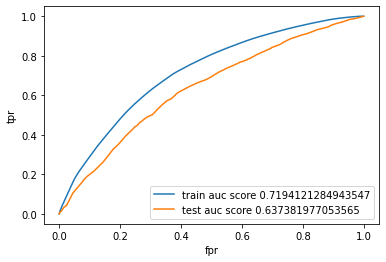

In [89]:
plt.plot(fpr_train,tpr_train,label=f'train auc score {auc(fpr_train,tpr_train)}')
plt.plot(fpr_test,tpr_test,label=f'test auc score {auc(fpr_test,tpr_test)}')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [90]:
def best_threshold(fpr,tpr,threshold):
  return threshold[np.argmax(tpr*(1-fpr))]

In [91]:
def pre_thre(prob,thre):
  u=[]
  for i in prob:
    if i>=thre:
      u.append(1)
    else:
      u.append(0)  
  return u

In [92]:
best_thre=best_threshold(fpr_train,tpr_train,threshold_train)

In [93]:
#best threshold 
best_thre

0.8587360594795539

In [94]:
best_threshold_proba_values=pre_thre(m.predict_proba(X).T[1],best_thre)

In [95]:
best_threshold_proba_values_test=pre_thre(m.predict_proba(X_test).T[1],best_thre)

In [96]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'actual')

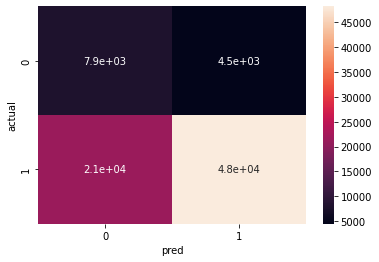

In [97]:
#train set 
sns.heatmap(confusion_matrix(y_train,best_threshold_proba_values),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

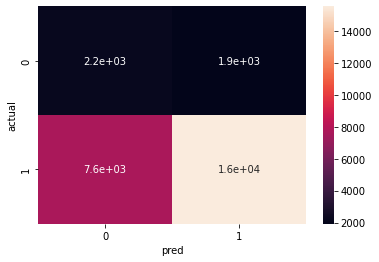

In [98]:
#test set 
sns.heatmap(confusion_matrix(y_test,best_threshold_proba_values_test),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [99]:
import warnings
warnings.filterwarnings('ignore')
fp=pd.DataFrame(columns=x.columns)
fp_y=[]
uuu=y_train.to_numpy()
mp=best_threshold_proba_values
for i in tqdm(range(len(y_train))):
  if mp[i]==1 and uuu[i]==0:
    fp=fp.append(x.iloc[i])
    fp_y.append(uuu[i])

100%|██████████| 81936/81936 [00:11<00:00, 6897.76it/s]


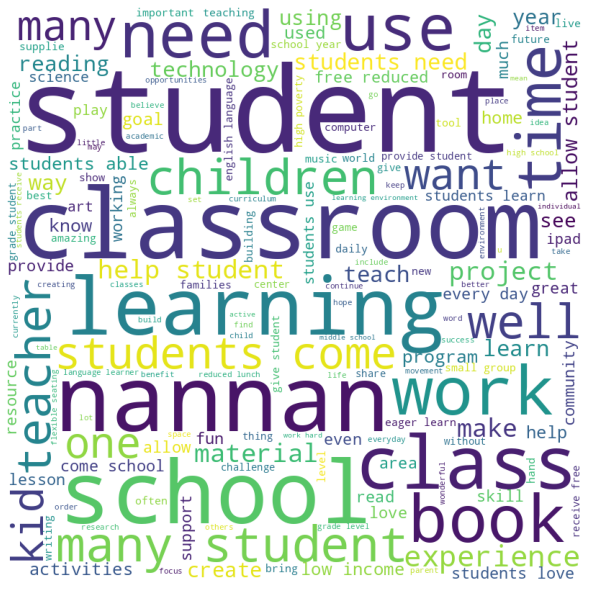

In [100]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = fp
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:xlabel='teacher_number_of_previously_posted_projects', ylabel='Density'>

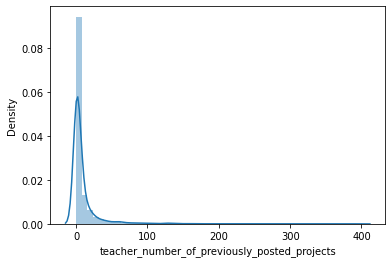

In [101]:
sns.distplot(fp['teacher_number_of_previously_posted_projects'])

<AxesSubplot:xlabel='price'>

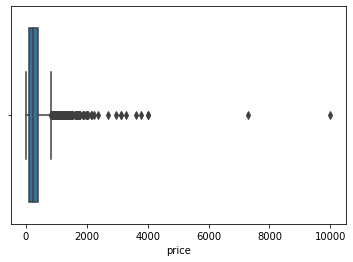

In [102]:
sns.boxplot(fp['price'])

### Training Decision Tree only with Top features

In [104]:
clf = DecisionTreeClassifier()

In [105]:
clf.fit(X11,y_train)

DecisionTreeClassifier()

In [106]:
feature_imp_indices=np.argwhere(clf.feature_importances_)

In [107]:
#old=X11.getcol([0])
for i in tqdm(range(len(feature_imp_indices)-1)):
  if i==0:
    old=hstack([X11.getcol(feature_imp_indices[i][0]),X11.getcol(feature_imp_indices[i+1][0])])
  else:
    old=hstack([old,X11.getcol(feature_imp_indices[i+1][0])])

100%|██████████| 3810/3810 [23:29<00:00,  2.70it/s]


In [108]:
train_f=old.copy()

In [109]:
train_f

<81936x3811 sparse matrix of type '<class 'numpy.float64'>'
	with 7925346 stored elements in COOrdinate format>

In [110]:
y_train.to_numpy()

array([1, 1, 1, ..., 0, 1, 1])

In [111]:
for i in range(len(feature_imp_indices)-1):
  if i==0:
    old=hstack([X_test11.getcol(feature_imp_indices[i][0]),X_test11.getcol(feature_imp_indices[i+1][0])])
  else:
    old=hstack([old,X_test11.getcol(feature_imp_indices[i+1][0])])

In [112]:
test_f=old

In [113]:
test_f

<27312x3811 sparse matrix of type '<class 'numpy.float64'>'
	with 2644429 stored elements in COOrdinate format>

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
paras={'max_depth':[1, 3, 10, 30],'min_samples_split':[5, 10, 100, 500]}
model2=GridSearchCV(DecisionTreeClassifier(),paras,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True)
model2.fit(train_f,y_train.to_numpy())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 10, 30],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [115]:
model12=model1

In [116]:
model1=model2

In [117]:
#X11=X
#X=X1

In [118]:
auc=model1.cv_results_['mean_test_score']

In [119]:
auc1=model1.cv_results_['mean_train_score']

In [120]:
model1.cv_results_['param_max_depth']

masked_array(data=[1, 1, 1, 1, 3, 3, 3, 3, 10, 10, 10, 10, 30, 30, 30, 30],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object)

In [121]:
import pandas as pd

In [122]:
y11=pd.DataFrame(data=auc.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

In [123]:
y11

,5,10,100,500
1,0.549858,0.549858,0.549858,0.549858
3,0.601530,0.601530,0.601530,0.601530
10,0.644003,0.644037,0.647635,0.651182
30,0.584593,0.589329,0.617821,0.644830


In [124]:
y1=pd.DataFrame(data=auc1.reshape(4,4),columns=[5,10,100,500],index=[1,3,10,30])

Text(0.5, 1.0, 'Train set')

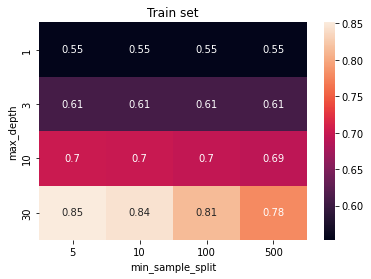

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y1,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Train set')

Text(0.5, 1.0, 'Test set')

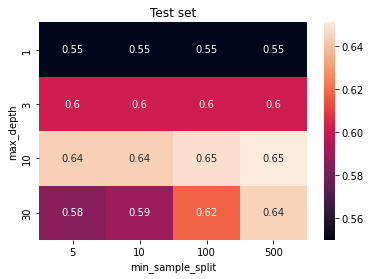

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(y11,annot=True)
plt.ylabel('max_depth')
plt.xlabel('min_sample_split')
plt.title('Test set')

In [127]:
model1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [128]:
m=DecisionTreeClassifier(max_depth=model1.best_params_['max_depth'],min_samples_split=model1.best_params_['min_samples_split'])
m.fit(X,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=500)

In [129]:
X_test11=X_test
X_test=X_test1

In [130]:
from sklearn.metrics import roc_curve,auc
fpr_train,tpr_train,threshold_train=roc_curve(y_train,m.predict_proba(X).T[1])
fpr_test,tpr_test,threshold_test=roc_curve(y_test,m.predict_proba(X_test).T[1])

In [131]:
#auc for train data
auc(fpr_train,tpr_train)

0.7193453243872129

In [132]:
#auc for test data
auc(fpr_test,tpr_test)

0.6370532389355626

Text(0, 0.5, 'tpr')

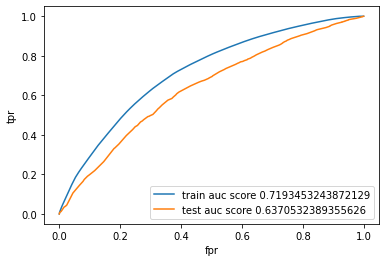

In [133]:
plt.plot(fpr_train,tpr_train,label=f'train auc score {auc(fpr_train,tpr_train)}')
plt.plot(fpr_test,tpr_test,label=f'test auc score {auc(fpr_test,tpr_test)}')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [134]:
def best_threshold(fpr,tpr,threshold):
  return threshold[np.argmax(tpr*(1-fpr))]

In [135]:
def pre_thre(prob,thre):
  u=[]
  for i in prob:
    if i>=thre:
      u.append(1)
    else:
      u.append(0)  
  return u

In [136]:
best_thre=best_threshold(fpr_train,tpr_train,threshold_train)

In [137]:
#best threshold 
best_thre

0.8587360594795539

In [138]:
best_threshold_proba_values=pre_thre(m.predict_proba(X).T[1],best_thre)

In [139]:
best_threshold_proba_values_test=pre_thre(m.predict_proba(X_test).T[1],best_thre)

In [140]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'actual')

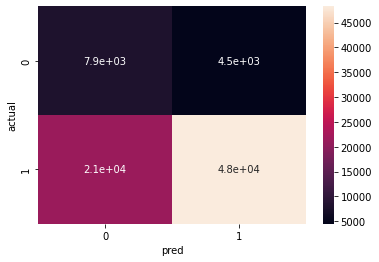

In [141]:
#train set 
sns.heatmap(confusion_matrix(y_train,best_threshold_proba_values),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [142]:
confusion_matrix(y_train,best_threshold_proba_values)

array([[ 7928,  4478],
       [21252, 48278]])

Text(33.0, 0.5, 'actual')

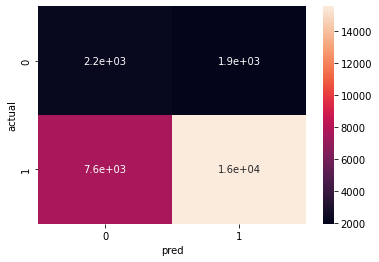

In [143]:
#test set 
sns.heatmap(confusion_matrix(y_test,best_threshold_proba_values_test),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [144]:
y_train.to_numpy()

array([1, 1, 1, ..., 0, 1, 1])

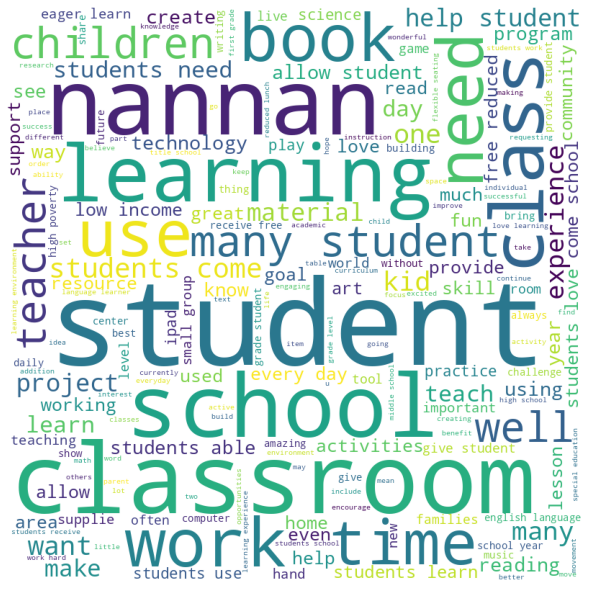

In [145]:
#!pip install matplotlib
#!pip install pandas
#!pip install wordcloud
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = fp
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:xlabel='teacher_number_of_previously_posted_projects', ylabel='Density'>

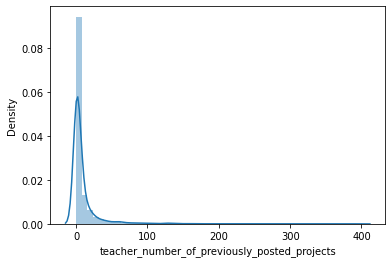

In [146]:
sns.distplot(fp['teacher_number_of_previously_posted_projects'])

<AxesSubplot:xlabel='price'>

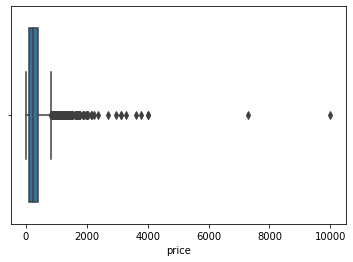

In [147]:
sns.boxplot(fp['price'])

In [151]:
from tabulate import tabulate
  
mydata = [["DT", "Set1(tfidf)", "max_depth=10 , min_sample_split=500", 0.6549693750838759], 
          ["DT", "set2(tfidfw2v)", "max_depth=10 , min_sample_split=500", 0.637381977053565], 
          ["DT", "important features", "max_depth=10 , min_sample_split=500", 0.6370532389355626]]
head = ["model","set","hyper parameters",'AUC score']
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------+--------------------+-------------------------------------+-------------+
| model   | set                | hyper parameters                    |   AUC score |
+=========+====================+=====================================+=============+
| DT      | Set1(tfidf)        | max_depth=10 , min_sample_split=500 |        0.65 |
+---------+--------------------+-------------------------------------+-------------+
| DT      | set2(tfidfw2v)     | max_depth=10 , min_sample_split=500 |        0.63 |
+---------+--------------------+-------------------------------------+-------------+
| DT      | important features | max_depth=10 , min_sample_split=500 |        0.65 |
+---------+--------------------+-------------------------------------+-------------+
